## **>>> Fazer Upload dos Arquivos Localmente**



In [2]:
from google.colab import files
import pandas as pd

# Upload dos arquivos
uploaded_1 = files.upload()
uploaded_2 = files.upload()

# Obter o nome do arquivo
nome_arquivo_1 = list(uploaded_1.keys())[0]
nome_arquivo_2 = list(uploaded_2.keys())[0]

# Ler o arquivo CSV usando o Pandas
dados_2019 = pd.read_csv(nome_arquivo_1, sep=';')
dados_2020 = pd.read_csv(nome_arquivo_2, sep=';')

Saving GERACAO_USINA_2019.csv to GERACAO_USINA_2019.csv


Saving GERACAO_USINA_2020.csv to GERACAO_USINA_2020.csv


## **>>> Verificações Básicas**


1.   Dados ausentes;
2.   Dados duplicados.



In [3]:
# Verificar dados ausentes
dados_2019.isnull().sum()
dados_2020.isnull().sum()

# Tratar dados ausentes (se houver)
dados_2019 = dados_2019.dropna()
dados_2020 = dados_2020.dropna()

# Verificar duplicatas
dados_2019.duplicated().sum()
dados_2020.duplicated().sum()

# Remover duplicatas (se houver)
dados_2019 = dados_2019.drop_duplicates()
dados_2020 = dados_2020.drop_duplicates()


## **>>> Uma Rápida Visualização nos Dados de 2019**

In [4]:
print(dados_2019.head())

          din_instante id_subsistema nom_subsistema id_estado nom_estado  \
0  2019-01-01 00:00:00             N          NORTE        AM   AMAZONAS   
1  2019-01-01 00:00:00             N          NORTE        AM   AMAZONAS   
2  2019-01-01 00:00:00             N          NORTE        AM   AMAZONAS   
3  2019-01-01 00:00:00             N          NORTE        AM   AMAZONAS   
4  2019-01-01 00:00:00             N          NORTE        AM   AMAZONAS   

  cod_modalidadeoperacao  nom_tipousina nom_tipocombustivel    nom_usina  \
0                 TIPO I  HIDROELÉTRICA          Hidráulica      Balbina   
1               TIPO III        TÉRMICA         Óleo Diesel     Flores 4   
2                 TIPO I        TÉRMICA                 Gás  Ponta Negra   
3                 TIPO I        TÉRMICA                 Gás     Tambaqui   
4               TIPO III        TÉRMICA    Óleo Combustível   Distrito A   

                     ceg  val_geracao  
0  UHE.PH.AM.000190-2.01       82.993  
1  UTE

## **>>> Distribuição de Geração de Energia por Subsistema em 2019**

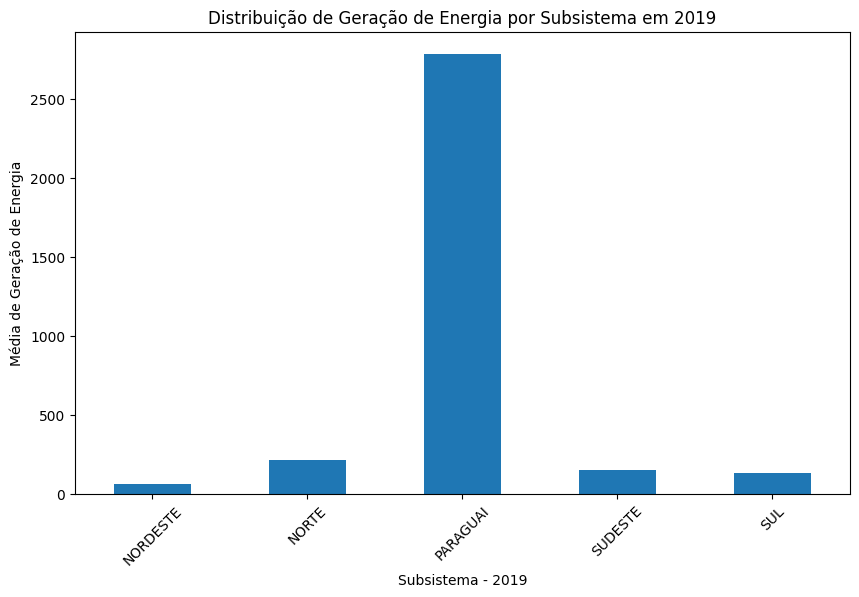

In [5]:
import matplotlib.pyplot as plt

# Agrupar dados por subsistema e calcular a média de geração de energia
dados_subsistema_2019 = dados_2019.groupby('nom_subsistema')['val_geracao'].mean()

# Gráfico de barras da média de geração de energia por subsistema
plt.figure(figsize=(10, 6))
dados_subsistema_2019.plot(kind='bar')
plt.xlabel('Subsistema - 2019')
plt.ylabel('Média de Geração de Energia')
plt.title('Distribuição de Geração de Energia por Subsistema em 2019')
plt.xticks(rotation=45)
plt.show()




## **>>> Distribuição de Geração de Energia por Estado em 2019**

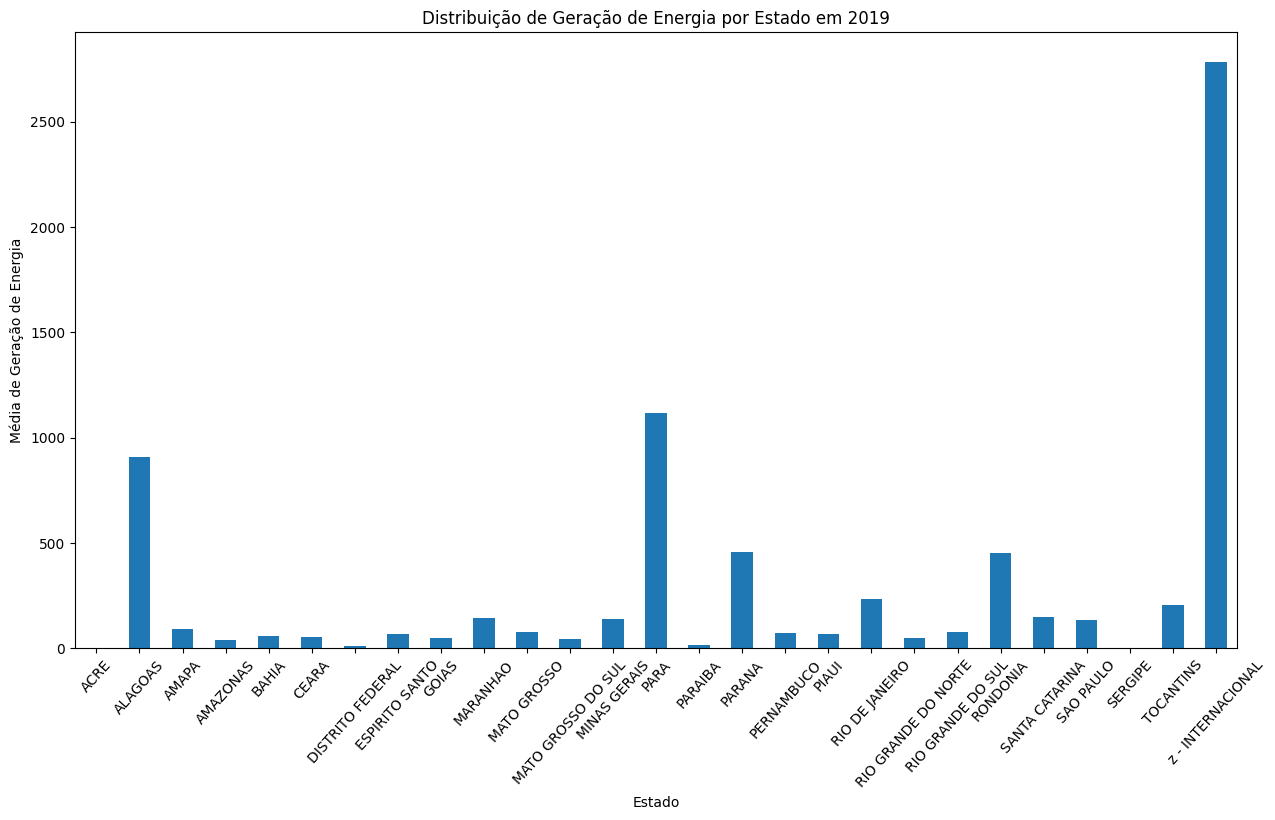

In [7]:
# Agrupar dados por estado e calcular a média de geração de energia
dados_estado_2019 = dados_2019.groupby('nom_estado')['val_geracao'].mean()

# Gráfico de barras da média de geração de energia por estado
plt.figure(figsize=(15, 8))
dados_estado_2019.plot(kind='bar')
plt.xlabel('Estado')
plt.ylabel('Média de Geração de Energia')
plt.title('Distribuição de Geração de Energia por Estado em 2019')
plt.xticks(rotation=48)
plt.show()


## **>>> Distribuição de Geração de Energia por Tipo de Usina em 2019**

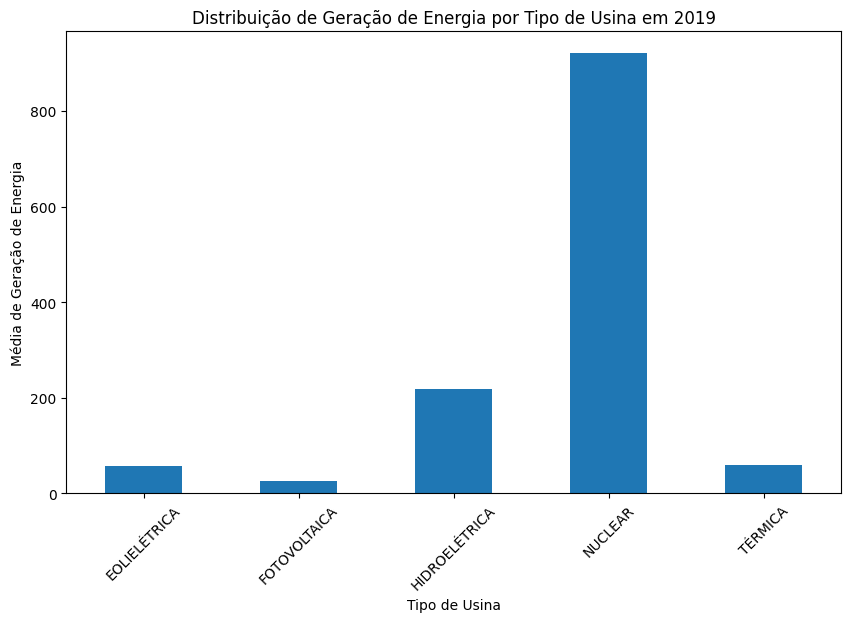

In [8]:
# Agrupar dados por tipo de usina e calcular a média de geração de energia
dados_tipo_usina_2019 = dados_2019.groupby('nom_tipousina')['val_geracao'].mean()

# Gráfico de barras da média de geração de energia por tipo de usina
plt.figure(figsize=(10, 6))
dados_tipo_usina_2019.plot(kind='bar')
plt.xlabel('Tipo de Usina')
plt.ylabel('Média de Geração de Energia')
plt.title('Distribuição de Geração de Energia por Tipo de Usina em 2019')
plt.xticks(rotation=45)
plt.show()


## **>>> Distribuição por Mês e Agrupado por Tipo de Usina em 2019**

In [9]:
import pandas as pd

dados_2019 = pd.read_csv(nome_arquivo_1, sep=';')

# Converter a coluna 'din_instante' para o tipo datetime
dados_2019['din_instante'] = pd.to_datetime(dados_2019['din_instante'])

# Extrair o mês da coluna 'din_instante' e criar uma nova coluna 'mes'
dados_2019['mes'] = dados_2019['din_instante'].dt.month

# Agrupar os dados por mês e 'nom_tipousina' e contar o número de ocorrências
grouped_data_2019 = dados_2019.groupby(['mes', 'nom_tipousina']).size().reset_index(name='count')

# Exibir o DataFrame resultante
print(grouped_data_2019)


    mes  nom_tipousina   count
0     1   EOLIELÉTRICA   76632
1     1   FOTOVOLTAICA   12648
2     1  HIDROELÉTRICA  160320
3     1        NUCLEAR    1488
4     1        TÉRMICA  123144
5     2   EOLIELÉTRICA   69888
6     2   FOTOVOLTAICA   12096
7     2  HIDROELÉTRICA  145152
8     2        NUCLEAR    1344
9     2        TÉRMICA  106176
10    3   EOLIELÉTRICA   78120
11    3   FOTOVOLTAICA   14136
12    3  HIDROELÉTRICA  160704
13    3        NUCLEAR    1488
14    3        TÉRMICA  117552
15    4   EOLIELÉTRICA   75600
16    4   FOTOVOLTAICA   13680
17    4  HIDROELÉTRICA  155520
18    4        NUCLEAR    1440
19    4        TÉRMICA  113760
20    5   EOLIELÉTRICA   78864
21    5   FOTOVOLTAICA   14136
22    5  HIDROELÉTRICA  161112
23    5        NUCLEAR    1488
24    5        TÉRMICA  118296
25    6   EOLIELÉTRICA   76320
26    6   FOTOVOLTAICA   13680
27    6  HIDROELÉTRICA  153697
28    6        NUCLEAR    1440
29    6        TÉRMICA  114480
30    7   EOLIELÉTRICA   78864
31    7 

## **>>> Uma Rápida Visualização nos Dados de 2020**

In [10]:
print(dados_2020.head())

          din_instante id_subsistema nom_subsistema id_estado nom_estado  \
0  2020-01-01 00:00:00             N          NORTE        AM   AMAZONAS   
1  2020-01-01 00:00:00             N          NORTE        AM   AMAZONAS   
2  2020-01-01 00:00:00             N          NORTE        AM   AMAZONAS   
3  2020-01-01 00:00:00             N          NORTE        AM   AMAZONAS   
4  2020-01-01 00:00:00             N          NORTE        AM   AMAZONAS   

  cod_modalidadeoperacao  nom_tipousina nom_tipocombustivel  \
0                 TIPO I  HIDROELÉTRICA          Hidráulica   
1                 TIPO I        TÉRMICA                 Gás   
2               TIPO III        TÉRMICA         Óleo Diesel   
3               TIPO III        TÉRMICA         Óleo Diesel   
4                 TIPO I        TÉRMICA                 Gás   

           nom_usina                    ceg  val_geracao  
0            Balbina  UHE.PH.AM.000190-2.01      143.411  
1           Manauara  UTE.GN.AM.029432-2.01   

## **>>> Distribuição de Geração de Energia por Subsistema em 2020**

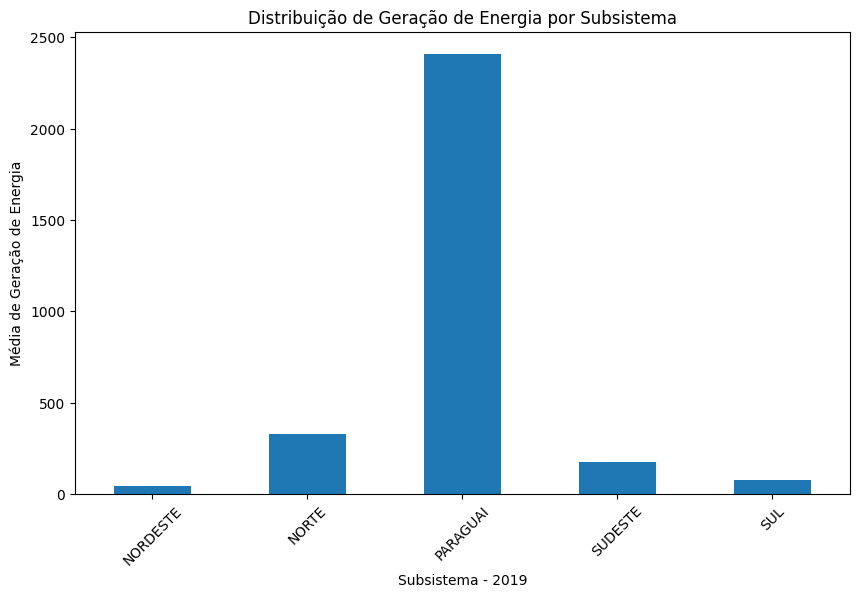

In [11]:
import matplotlib.pyplot as plt

# Agrupar dados por subsistema e calcular a média de geração de energia
dados_subsistema_2020 = dados_2020.groupby('nom_subsistema')['val_geracao'].mean()

# Gráfico de barras da média de geração de energia por subsistema
plt.figure(figsize=(10, 6))
dados_subsistema_2020.plot(kind='bar')
plt.xlabel('Subsistema - 2019')
plt.ylabel('Média de Geração de Energia')
plt.title('Distribuição de Geração de Energia por Subsistema')
plt.xticks(rotation=45)
plt.show()

## **>>> Distribuição de Geração de Energia por Estado em 2020**

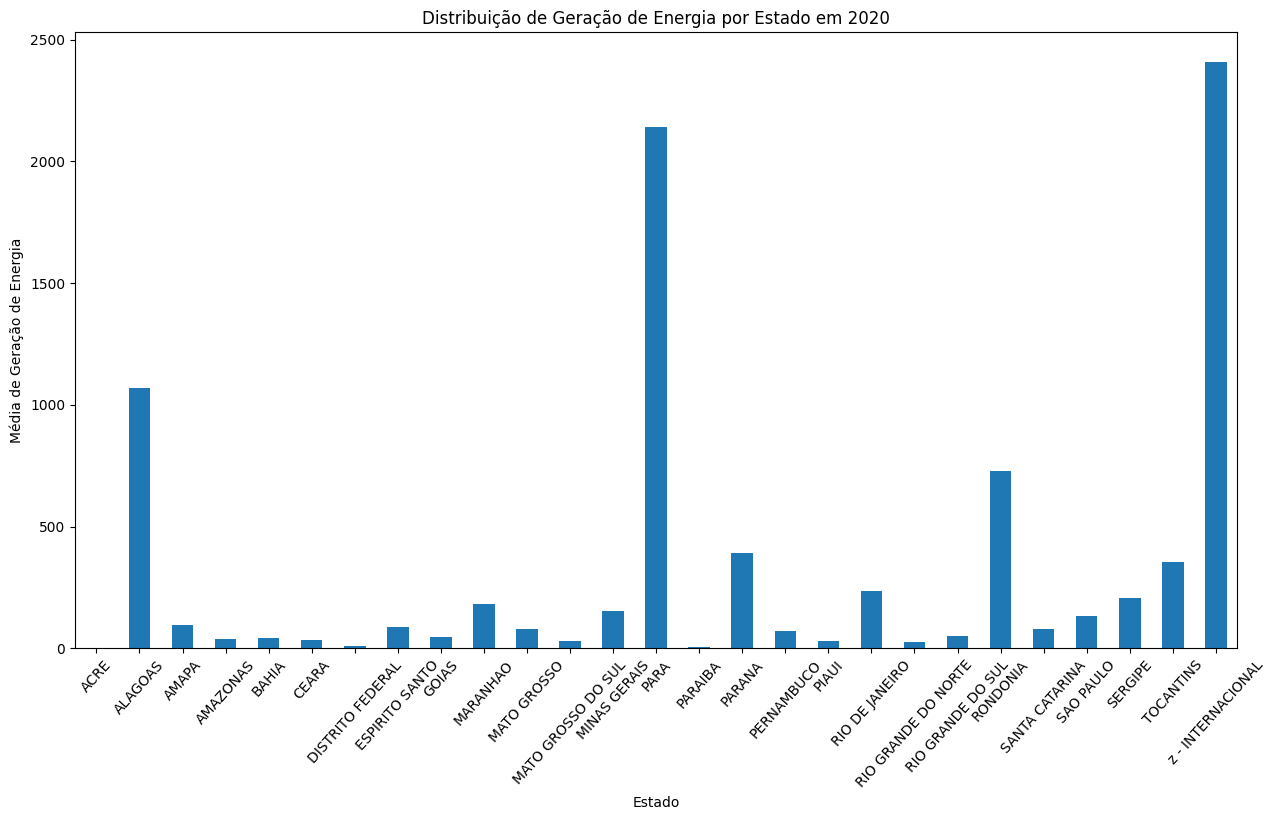

In [12]:
# Agrupar dados por estado e calcular a média de geração de energia
dados_estado_2020 = dados_2020.groupby('nom_estado')['val_geracao'].mean()

# Gráfico de barras da média de geração de energia por estado
plt.figure(figsize=(15, 8))
dados_estado_2020.plot(kind='bar')
plt.xlabel('Estado')
plt.ylabel('Média de Geração de Energia')
plt.title('Distribuição de Geração de Energia por Estado em 2020')
plt.xticks(rotation=48)
plt.show()


## **>>> Distribuição de Geração de Energia por Tipo de Usina em 2020**

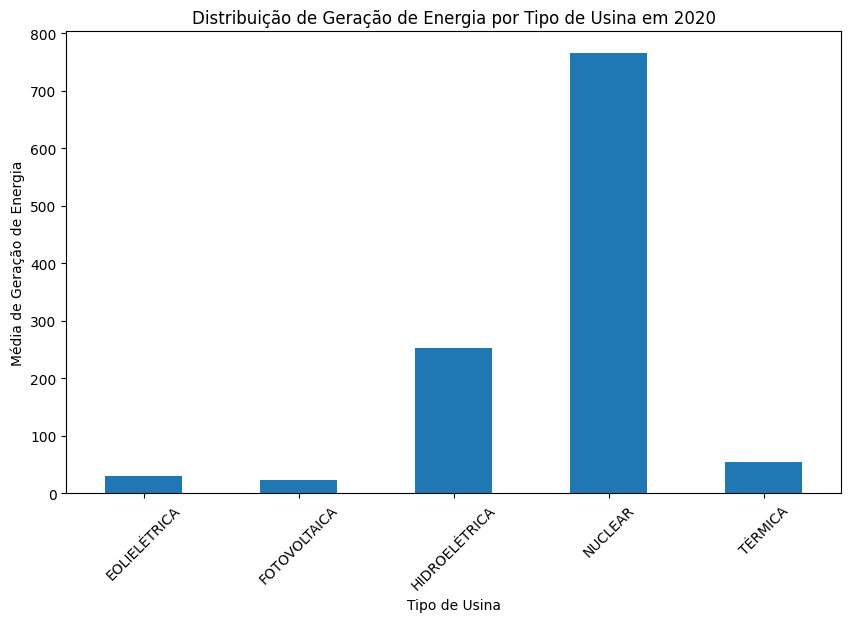

In [13]:
# Agrupar dados por tipo de usina e calcular a média de geração de energia
dados_tipo_usina_2020 = dados_2020.groupby('nom_tipousina')['val_geracao'].mean()

# Gráfico de barras da média de geração de energia por tipo de usina
plt.figure(figsize=(10, 6))
dados_tipo_usina_2020.plot(kind='bar')
plt.xlabel('Tipo de Usina')
plt.ylabel('Média de Geração de Energia')
plt.title('Distribuição de Geração de Energia por Tipo de Usina em 2020')
plt.xticks(rotation=45)
plt.show()


## **>>> Distribuição por Mês e Agrupado por Tipo de Usina em 2020**

In [14]:
import pandas as pd

dados_2020 = pd.read_csv(nome_arquivo_2, sep=';')

# Converter a coluna 'din_instante' para o tipo datetime
dados_2020['din_instante'] = pd.to_datetime(dados_2020['din_instante'])

# Extrair o mês da coluna 'din_instante' e criar uma nova coluna 'mes'
dados_2020['mes'] = dados_2020['din_instante'].dt.month

# Agrupar os dados por mês e 'nom_tipousina' e contar o número de ocorrências
grouped_data_2020 = dados_2020.groupby(['mes', 'nom_tipousina']).size().reset_index(name='count')

# Exibir o DataFrame resultante
print(grouped_data_2020)


    mes  nom_tipousina   count
0     1   EOLIELÉTRICA   81096
1     1   FOTOVOLTAICA   16368
2     1  HIDROELÉTRICA  159216
3     1        NUCLEAR    1488
4     1        TÉRMICA  120024
5     2   EOLIELÉTRICA   75864
6     2   FOTOVOLTAICA   15312
7     2  HIDROELÉTRICA  148944
8     2        NUCLEAR    1392
9     2        TÉRMICA  112752
10    3   EOLIELÉTRICA   69031
11    3   FOTOVOLTAICA   14176
12    3  HIDROELÉTRICA  131845
13    3        NUCLEAR    1232
14    3        TÉRMICA   99835


## **>>> Distribuição por Tipo de Usina em 2019**

In [15]:
# Agrupar por ano da coluna 'din_instante' e contar ocorrências de cada valor em 'nom_tipousina'
df_por_ano_2019 = dados_2019.groupby(dados_2019['din_instante'].dt.to_period('Y'))['nom_tipousina'].value_counts()

# Exibir o DataFrame resultante
print(df_por_ano_2019)

din_instante  nom_tipousina
2019          HIDROELÉTRICA    1882658
              TÉRMICA          1394376
              EOLIELÉTRICA      928200
              FOTOVOLTAICA      171816
              NUCLEAR            17520
Name: nom_tipousina, dtype: int64


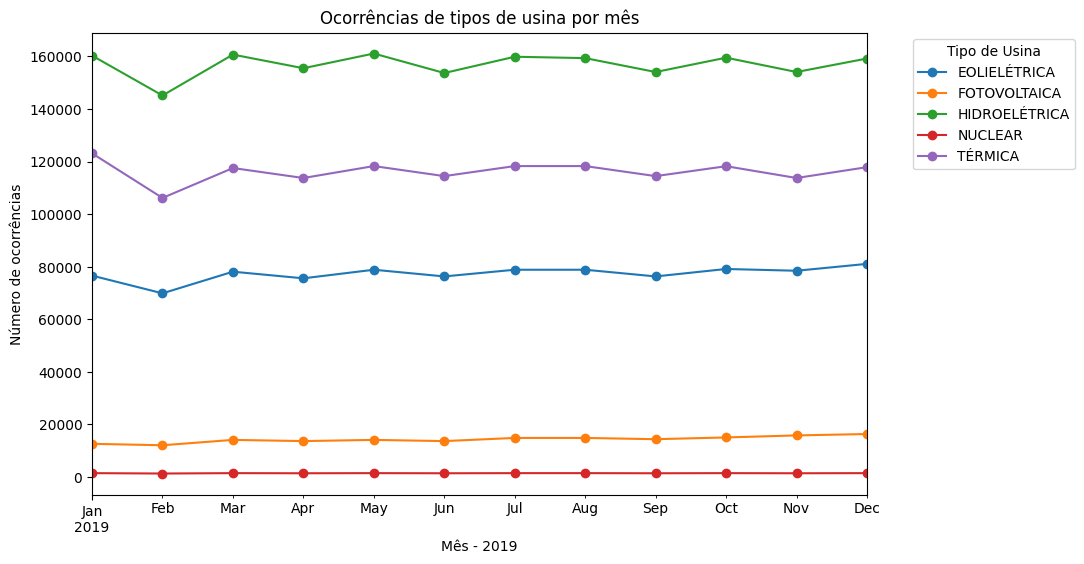

In [16]:
import matplotlib.pyplot as plt

# Agrupar por mês da coluna 'din_instante' e contar ocorrências de cada valor em 'nom_tipousina'
df_por_mes_2019 = dados_2019.groupby(dados_2019['din_instante'].dt.to_period('M'))['nom_tipousina'].value_counts()

# Reformatar o DataFrame resultante para facilitar a plotagem
df_por_mes_2019 = df_por_mes_2019.unstack().fillna(0)

# Plotar o gráfico de linhas
df_por_mes_2019.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Ocorrências de tipos de usina por mês')
plt.xlabel('Mês - 2019')
plt.ylabel('Número de ocorrências')
plt.legend(title='Tipo de Usina', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1400: UserWarning: Attem

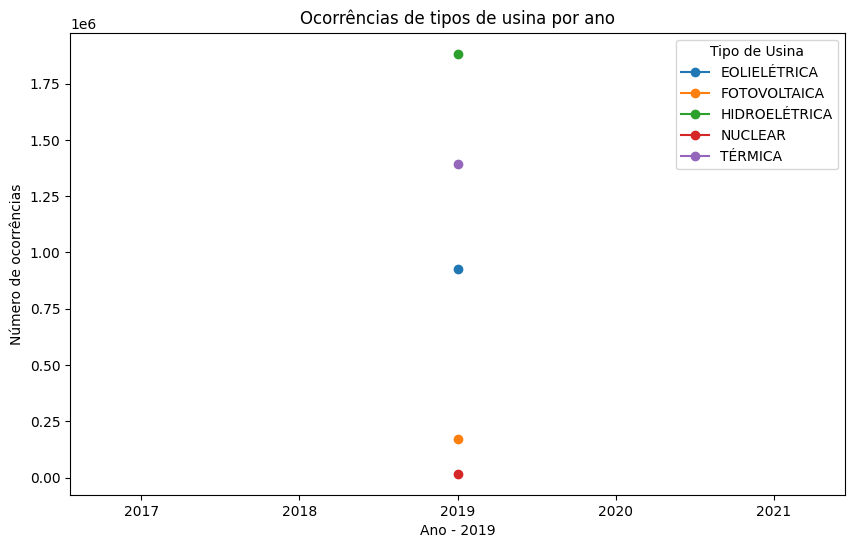

In [17]:
# Agrupar por ano da coluna 'din_instante' e contar ocorrências de cada valor em 'nom_tipousina'
df_por_ano_2019 = dados_2019.groupby(dados_2019['din_instante'].dt.to_period('Y'))['nom_tipousina'].value_counts()

# Reformatar o DataFrame resultante para facilitar a plotagem
df_por_ano_2019 = df_por_ano_2019.unstack().fillna(0)

# Plotar o gráfico de linhas
df_por_ano_2019.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Ocorrências de tipos de usina por ano')
plt.xlabel('Ano - 2019')
plt.ylabel('Número de ocorrências')
plt.legend(title='Tipo de Usina')
plt.show()


## **>>> Distribuição por Geração de Energia em 2019**

        val_geracao
count  4.370618e+06
mean   1.292919e+02
std    4.033067e+02
min    0.000000e+00
25%    0.000000e+00
50%    3.000000e+01
75%    9.573400e+01
max    7.271855e+03


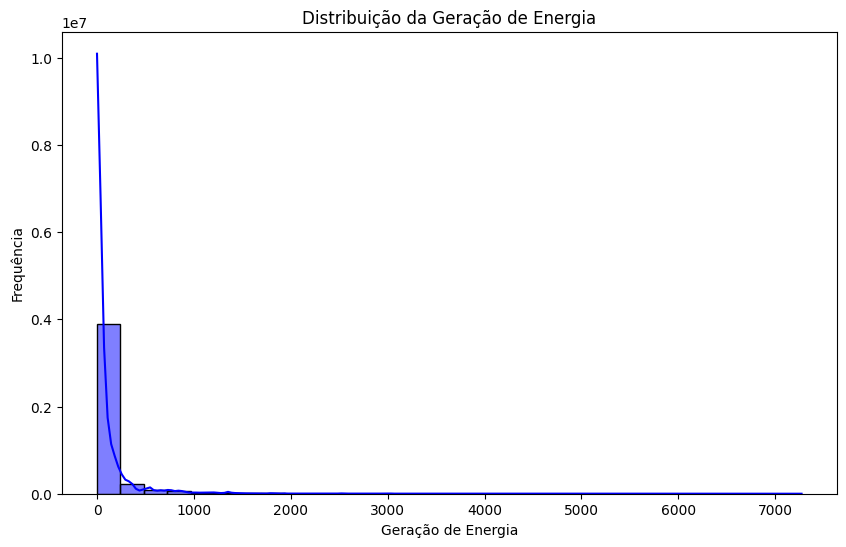

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dados_2019 = pd.read_csv(nome_arquivo_1, sep=';')

# Resumo estatístico das variáveis numéricas
print(dados_2019.describe())

# Visualização da distribuição da variável alvo 'val_geracao'
plt.figure(figsize=(10, 6))
sns.histplot(dados_2019['val_geracao'], bins=30, kde=True, color='blue')
plt.title('Distribuição da Geração de Energia')
plt.xlabel('Geração de Energia')
plt.ylabel('Frequência')
plt.show()


## **>>> Treinando o Modelo de Regressão para Geração de Energia - 2019**

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

dados_2019 = pd.read_csv(nome_arquivo_1,sep=';')

# Remover linhas com valores ausentes na variável alvo
dados_2019.dropna(subset=['val_geracao'], inplace=True)

# Pré-processamento de dados
X = dados_2019.drop('val_geracao', axis=1)  # Features
y = dados_2019['val_geracao']  # Alvo

# Separar as colunas categóricas e numéricas
colunas_numericas_2019 = X.select_dtypes(include=['float64', 'int64']).columns
colunas_categoricas_2019 = X.select_dtypes(include=['object']).columns

# Construir um transformador para aplicar one-hot encoding nas variáveis categóricas
transformer_2019 = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), colunas_categoricas_2019)
    ],
    remainder='passthrough'
)

# Criar um pipeline com o transformador e o modelo de regressão linear
pipeline_2019 = Pipeline([
    ('preprocessor', transformer_2019),
    ('model', LinearRegression())
])

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
pipeline_2019.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = pipeline_2019.predict(X_test)

# Calcular métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calcula o RMSE a partir do MSE
r2 = r2_score(y_test, y_pred)

# Exibir as métricas
print('-- Métricas de Avaliação -- ')
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


-- Métricas de Avaliação -- 
Mean Absolute Error (MAE): 63.047104971057614
Mean Squared Error (MSE): 31371.979150121882
Root Mean Squared Error (RMSE): 177.1213684175963
R-squared (R²): 0.8090543228406463


## **>>> Visualizar os Coeficientes do Modelo Treinado - 2019**

In [20]:
# Acessar os coeficientes do modelo treinado
coeficientes_2019 = pipeline_2019.named_steps['model'].coef_

# Colunas para o DataFrame
colunas_2019 = transformer_2019.transformers_[0][1].get_feature_names_out(colunas_categoricas_2019).tolist() + colunas_numericas_2019.tolist()

# Criar DataFrame com coeficientes e colunas correspondentes
df_coeficientes_2019 = pd.DataFrame({'Variável': colunas_2019, 'Coeficiente': coeficientes_2019})

# Ordenar os coeficientes por magnitude
df_coeficientes_2019 = df_coeficientes_2019.reindex(df_coeficientes_2019['Coeficiente'].abs().sort_values(ascending=False).index)

# Exibir os coeficientes
print(df_coeficientes_2019)


                              Variável  Coeficiente
9489         ceg_UHE.PH.PR.001161-4.01  1696.924048
8882              nom_usina_Belo Monte  1551.295214
9130            nom_usina_Itaipu 60 Hz  1530.489799
9247                nom_usina_Pimental -1182.086560
9480         ceg_UHE.PH.PA.002889-4.01  1178.010468
...                                ...          ...
1253  din_instante_2019-02-22 05:00:00     0.013766
5458  din_instante_2019-08-16 10:00:00    -0.007402
8280  din_instante_2019-12-12 00:00:00    -0.006321
5745  din_instante_2019-08-28 09:00:00    -0.004344
3910  din_instante_2019-06-12 22:00:00    -0.002103

[9715 rows x 2 columns]


## **>>> Distribuição por Tipo de Usina em 2020**

In [21]:
# Agrupar por ano da coluna 'din_instante' e contar ocorrências de cada valor em 'nom_tipousina'
df_por_ano_2020 = dados_2020.groupby(dados_2020['din_instante'].dt.to_period('Y'))['nom_tipousina'].value_counts()

# Exibir o DataFrame resultante
print(df_por_ano_2020)

din_instante  nom_tipousina
2020          HIDROELÉTRICA    440005
              TÉRMICA          332611
              EOLIELÉTRICA     225991
              FOTOVOLTAICA      45856
              NUCLEAR            4112
Name: nom_tipousina, dtype: int64


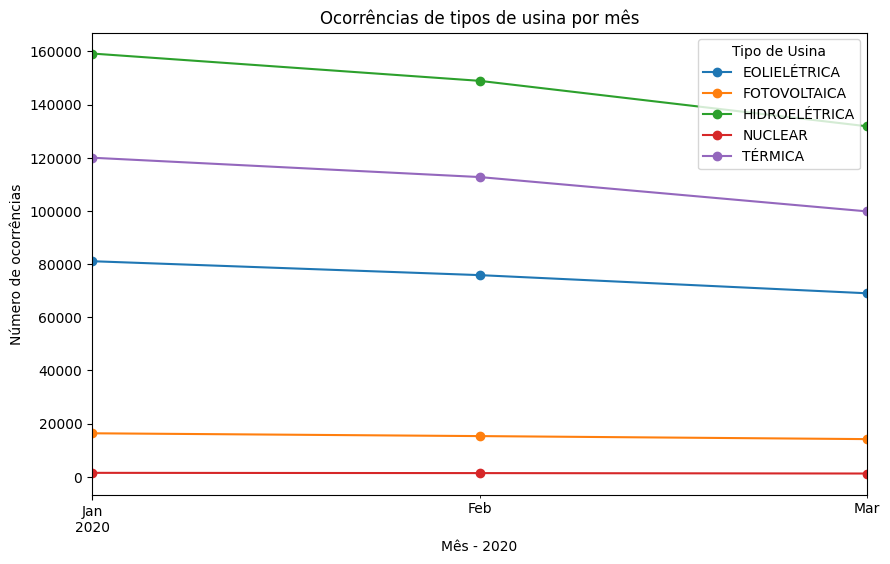

In [22]:
import matplotlib.pyplot as plt

# Agrupar por mês da coluna 'din_instante' e contar ocorrências de cada valor em 'nom_tipousina'
df_por_mes_2020 = dados_2020.groupby(dados_2020['din_instante'].dt.to_period('M'))['nom_tipousina'].value_counts()

# Reformatar o DataFrame resultante para facilitar a plotagem
df_por_mes_2020 = df_por_mes_2020.unstack().fillna(0)

# Plotar o gráfico de linhas
df_por_mes_2020.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Ocorrências de tipos de usina por mês')
plt.xlabel('Mês - 2020')
plt.ylabel('Número de ocorrências')
plt.legend(title='Tipo de Usina')
plt.show()


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1400: UserWarning: Attem

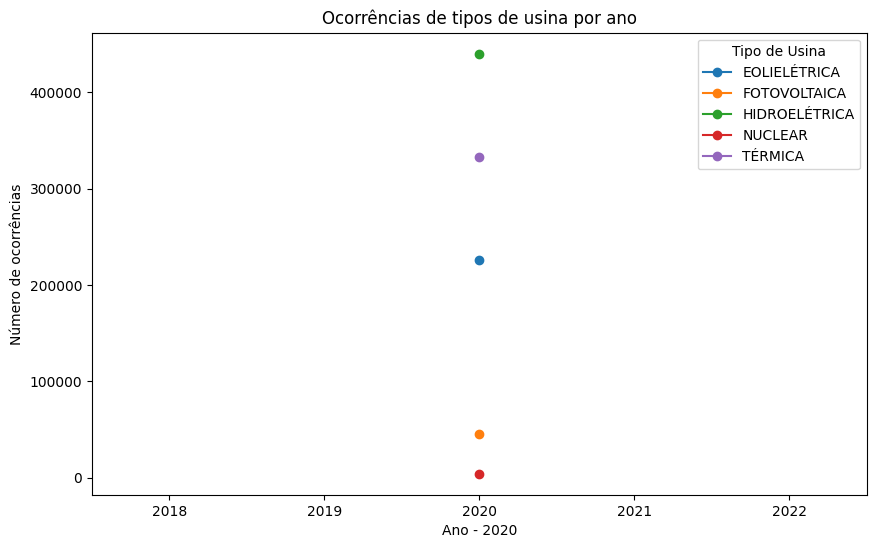

In [23]:
# Agrupar por ano da coluna 'din_instante' e contar ocorrências de cada valor em 'nom_tipousina'
df_por_ano_2020 = dados_2020.groupby(dados_2020['din_instante'].dt.to_period('Y'))['nom_tipousina'].value_counts()

# Reformatar o DataFrame resultante para facilitar a plotagem
df_por_ano_2020 = df_por_ano_2020.unstack().fillna(0)

# Plotar o gráfico de linhas
df_por_ano_2020.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Ocorrências de tipos de usina por ano')
plt.xlabel('Ano - 2020')
plt.ylabel('Número de ocorrências')
plt.legend(title='Tipo de Usina')
plt.show()


## **>>> Distribuição por Geração de Energia em 2020**

        val_geracao
count  1.046519e+06
mean   1.340666e+02
std    5.246971e+02
min    0.000000e+00
25%    0.000000e+00
50%    1.900800e+01
75%    7.999000e+01
max    1.070580e+04


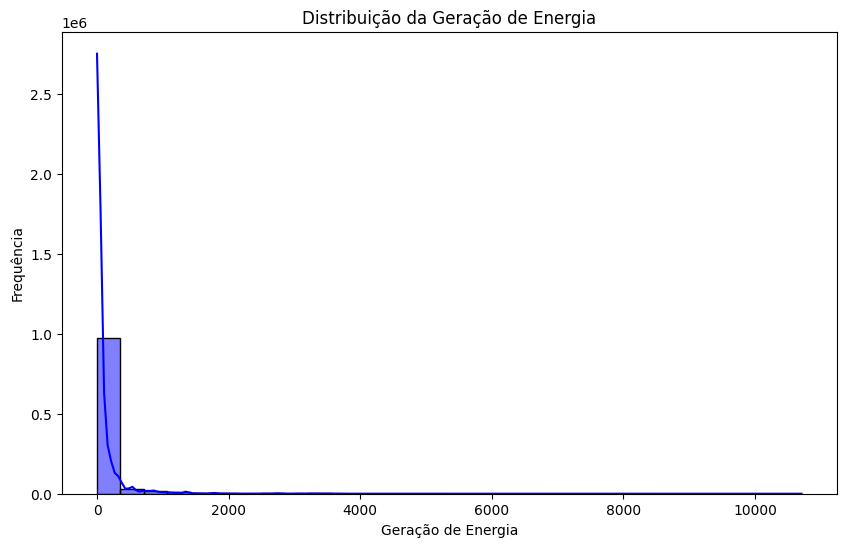

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dados_2020 = pd.read_csv(nome_arquivo_2, sep=';')

# Resumo estatístico das variáveis numéricas
print(dados_2020.describe())

# Visualização da distribuição da variável alvo 'val_geracao'
plt.figure(figsize=(10, 6))
sns.histplot(dados_2020['val_geracao'], bins=30, kde=True, color='blue')
plt.title('Distribuição da Geração de Energia')
plt.xlabel('Geração de Energia')
plt.ylabel('Frequência')
plt.show()


## **>>> Treinando o Modelo de Regressão para Geração de Energia - 2020**

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

dados_2020 = pd.read_csv(nome_arquivo_2,sep=';')

# Remover linhas com valores ausentes na variável alvo
dados_2020.dropna(subset=['val_geracao'], inplace=True)

# Pré-processamento de dados
X = dados_2020.drop('val_geracao', axis=1)  # Features
y = dados_2020['val_geracao']  # Alvo

# Separar as colunas categóricas e numéricas
colunas_numericas_2020 = X.select_dtypes(include=['float64', 'int64']).columns
colunas_categoricas_2020 = X.select_dtypes(include=['object']).columns

# Construir um transformador para aplicar one-hot encoding nas variáveis categóricas
transformer_2020 = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), colunas_categoricas_2020)
    ],
    remainder='passthrough'
)

# Criar um pipeline com o transformador e o modelo de regressão linear
pipeline_2020 = Pipeline([
    ('preprocessor', transformer_2020),
    ('model', LinearRegression())
])

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
pipeline_2020.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = pipeline_2020.predict(X_test)

# Calcular métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calcula o RMSE a partir do MSE
r2 = r2_score(y_test, y_pred)

# Exibir as métricas
print('-- Métricas de Avaliação -- ')
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


-- Métricas de Avaliação -- 
Mean Absolute Error (MAE): 50.72180468288933
Mean Squared Error (MSE): 24430.858673658888
Root Mean Squared Error (RMSE): 156.303738514659
R-squared (R²): 0.9102635972529338


## **>>> Visualizar os Coeficientes do Modelo Treinado - 2020**

In [26]:
# Acessar os coeficientes do modelo treinado
coeficientes_2020 = pipeline_2020.named_steps['model'].coef_

# Colunas para o DataFrame
colunas_2020 = transformer_2020.transformers_[0][1].get_feature_names_out(colunas_categoricas_2019).tolist() + colunas_numericas_2019.tolist()

# Criar DataFrame com coeficientes e colunas correspondentes
df_coeficientes_2020 = pd.DataFrame({'Variável': colunas_2020, 'Coeficiente': coeficientes_2020})

# Ordenar os coeficientes por magnitude
df_coeficientes_2020 = df_coeficientes_2020.reindex(df_coeficientes_2020['Coeficiente'].abs().sort_values(ascending=False).index)

# Exibir os coeficientes
print(df_coeficientes_2020)


                              Variável  Coeficiente
2178              nom_usina_Belo Monte  3616.271083
2540                nom_usina_Pimental -2665.008763
2770         ceg_UHE.PH.PR.001161-4.01  2035.980918
2424                  nom_usina_Itaipu  2035.243545
2440                   nom_usina_Jirau  1339.374592
...                                ...          ...
2920         ceg_UTE.GN.RJ.028029-1.01     0.043377
2621              nom_usina_Termomacaé     0.043377
551   din_instante_2020-01-23 23:00:00    -0.039212
454   din_instante_2020-01-19 22:00:00    -0.003608
760   din_instante_2020-02-01 16:00:00    -0.002477

[2983 rows x 2 columns]
